# WS 01

In [283]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()

In [284]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [285]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [286]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2])

df['class'] = cancer.target

df.sample(5, random_state=1)
# df.head()

,mean radius,mean texture,class
421,14.69,13.98,1
47,13.17,18.66,0
292,12.95,16.02,1
186,18.31,18.58,0
414,15.13,29.81,0


convert class to string

In [287]:
# df['class'] = np.where(df['class']==0, 'yes', 'no')  
# df['class'] = np.where(df['class']==0, 'malignant', 'benign') 

target_map = {0:'malignant', 1:'benign'}  # same
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [288]:
df.head()
# df.tail()

,mean radius,mean texture,class
0,17.99,10.38,malignant
1,20.57,17.77,malignant
2,19.69,21.25,malignant
3,11.42,20.38,malignant
4,20.29,14.34,malignant


In [289]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

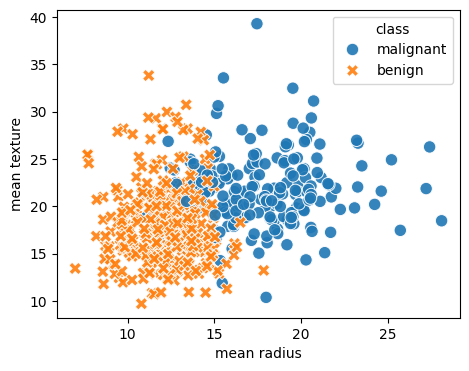

In [290]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.show()

In [291]:
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

array(['benign', 'malignant'], dtype=object)

In [292]:
y[40:50]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [293]:
X = df.drop('class', axis=1)
X.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [294]:
# y = df['class']
np.unique(y)
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [295]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

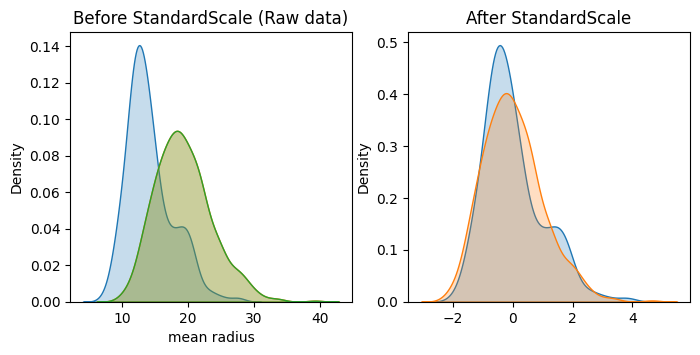

In [296]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before StandardScale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After StandardScale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()

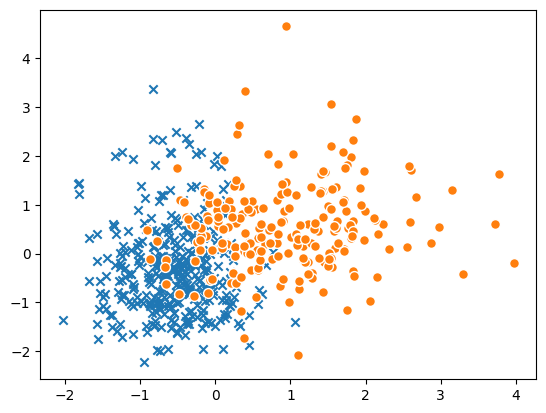

In [297]:
plt.scatter(X_sc[:,0][y==0], X_sc[:,1][y==0], marker='x')
plt.scatter(X_sc[:,0][y==1], X_sc[:,1][y==1], edgecolor='w', s=50)
plt.show()

In [298]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((426, 2), (143, 2))

In [299]:
y_train.shape, y_test.shape 

((426,), (143,))

In [300]:
X_train[:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [301]:
y_train[:5]

array([1, 0, 1, 0, 0], dtype=int64)

# ws 02

In [302]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(2,)))  

model.add(Dense(1, activation='sigmoid')) # 

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [303]:
input_size = X_train.shape[-1]
input_size

2

In [304]:
# input_size = X_train.shape[-1]
# model = Sequential([
#     Dense(32, activation='relu', input_shape=(input_size,)),
#     Dense(1, activation='sigmoid')
# ])

## Functional model

In [305]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

inputs = Input(shape=(2,))

x = Dense(32, activation="relu")(inputs)

outputs = Dense(1, activation="relu")(x)

model = Model(inputs=inputs, outputs=outputs, name="my_model")
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [306]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [307]:
model.output_shape

(None, 1)

In [308]:
model.get_config()

{'name': 'my_model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_13'},
   'registered_name': None,
   'name': 'input_layer_13',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_26',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'kernel_constraint': N

In [309]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train

In [310]:
import time

start = time.time()

history = model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=32, validation_split=0.25)

end = time.time()

print(f"Runtime of the program is {end - start} secs")
print("Time Taken: {:.3f} secs".format(end - start))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5196 - loss: 1.1586 - val_accuracy: 0.5514 - val_loss: 1.0446
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6114 - loss: 0.7279 - val_accuracy: 0.7009 - val_loss: 0.6688
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.5348 - val_accuracy: 0.7570 - val_loss: 0.5671
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.4451 - val_accuracy: 0.7570 - val_loss: 0.5082
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8247 - loss: 0.4106 - val_accuracy: 0.7383 - val_loss: 0.4666
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8637 - loss: 0.3431 - val_accuracy: 0.7570 - val_loss: 0.4371
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8736 - loss: 0.3308 - val_accuracy: 0.7757 - val_loss: 0.4134
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8984 - loss: 0.2869 - val_accuracy: 0.7850 - val_loss

In [311]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5415619611740112
Test accuracy: 0.8531468510627747


In [312]:
y_pred_pr = model.predict(X_test)
y_pred_pr[:4]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.169478  ],
       [0.02019107],
       [0.03289816],
       [1.0463866 ]], dtype=float32)

In [313]:
y_pred = (y_pred_pr > 0.5).astype(int)  
# y_pred = np.where(y_pred_pr > .5, 1,0)

y_pred[:4]

array([[0],
       [0],
       [0],
       [1]])

In [314]:
from sklearn.metrics import classification_report, confusion_matrix

print('Score->',score[1])

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Score-> 0.8531468510627747
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        88
           1       0.85      0.75      0.80        55

    accuracy                           0.85       143
   macro avg       0.85      0.83      0.84       143
weighted avg       0.85      0.85      0.85       143

[[81  7]
 [14 41]]


In [315]:
df_hist = pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

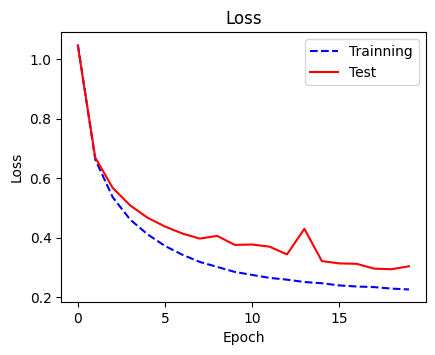

In [316]:
plt.figure(figsize=(4.7, 3.5))

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')
plt.show()

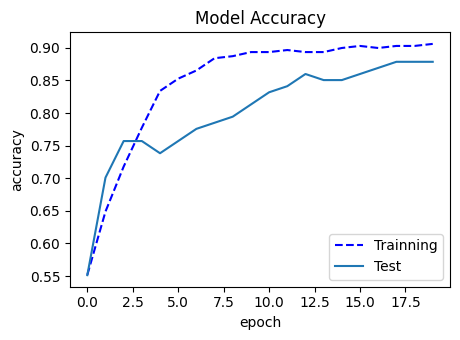

In [317]:
plt.figure(figsize=(4.7, 3.5))

df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.tight_layout() 

plt.show()

## Tensor board

In [318]:
'''from keras.callbacks import TensorBoard

history = model.fit(X_train, y_train, epochs=30, verbose=0, 
                     batch_size=32, validation_split=0.25,
                    callbacks=[TensorBoard(log_dir='./log')])  
'''

"from keras.callbacks import TensorBoard\n\nhistory = model.fit(X_train, y_train, epochs=30, verbose=0, \n                     batch_size=32, validation_split=0.25,\n                    callbacks=[TensorBoard(log_dir='./log')])  \n"

In [319]:
'''%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir ./log'''

'%load_ext tensorboard\n%reload_ext tensorboard\n%tensorboard --logdir ./log'

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 448us/step


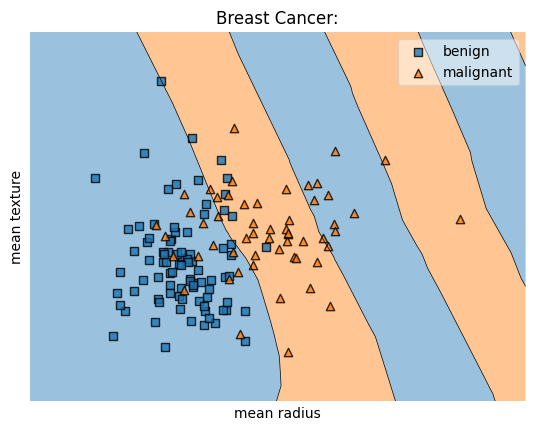

In [320]:

from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_test, y_test, clf=model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer:') 
plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.show()

## Predict

In [321]:
# X_new = [[16.4, 14.1]] #
X_new = [[16.4, 14.1],  # 
         [18.5, 15.1]] #

# X_new = X[104:110]

X_new_sc = sc.transform(X_new)
X_new_sc

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.64548141, -1.20766604],
       [ 1.24191122, -0.97495933]])

In [322]:
y_pred_pr = model.predict(X_new_sc)
y_pred = (y_pred_pr > 0.5).astype(int) 

print(class_names[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[['benign']
 ['malignant']]


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 421us/step


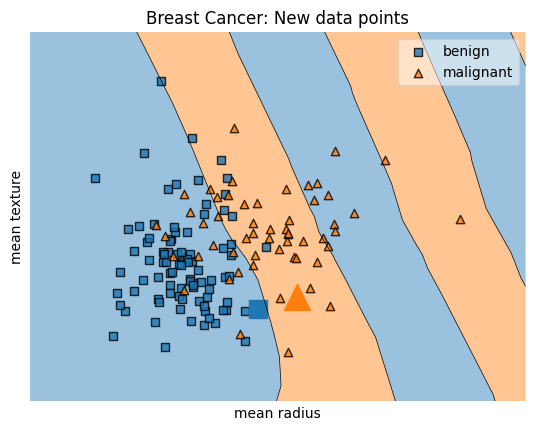

In [323]:
y_pred = y_pred.reshape(1,-1)[0] 

from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_test, y_test, clf=model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer: New data points')
plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.scatter(X_new_sc[:,0][y_pred==0], X_new_sc[:,1][y_pred==0], marker='s', s=180)
plt.scatter(X_new_sc[:,0][y_pred==1], X_new_sc[:,1][y_pred==1], marker='^', s=350) # 

plt.show()

# ws 03

In [324]:
model.save('./mymodel.h5')

In [325]:
model.save('./mymodel1/mymodel.h5')

# ws 04 

In [326]:
import pickle
pickle.dump(sc, open('./scaler.pkl','wb'))

In [327]:
file_name = "classname.pkl"

open_file = open(file_name, "wb")
pickle.dump(class_names, open_file)
open_file.close()

# ws 05

In [328]:
from tensorflow.keras.models import load_model

my_model = load_model('./mymodel.h5') 

In [329]:
my_model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (528.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [349]:
my_model.get_config()

{'name': 'my_model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_13'},
   'registered_name': None,
   'name': 'input_layer_13',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_26',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'kernel_constraint': N

In [350]:
from tensorflow.keras.models import load_model

new_model = load_model('./mymodel1/mymodel.h5')

In [351]:
model = new_model

In [352]:
# List all weight tensors 
model.get_weights()

[array([[ 0.48836675, -0.22226144, -0.24371547, -0.20294379, -0.2577787 ,
         -0.29603118,  0.35783225,  0.00998305, -0.32133138, -0.04401255,
          0.29261348,  0.24242951, -0.24615596, -0.12444241,  0.4126526 ,
         -0.17454563,  0.00616553, -0.40727845,  0.14200011,  0.35237318,
          0.4449298 , -0.24721439,  0.0127668 ,  0.3226694 , -0.29905963,
         -0.03906772, -0.15055194, -0.15725368,  0.06729043, -0.09756093,
          0.39988098,  0.09631764],
        [-0.3156311 , -0.03045013, -0.35670272, -0.33916545, -0.16836908,
          0.02123996, -0.22407691, -0.23332787, -0.05326419, -0.2106701 ,
          0.26810881,  0.3774295 , -0.1538698 ,  0.31253228,  0.05231185,
          0.32361966, -0.303908  ,  0.27884042,  0.03367836, -0.20488118,
          0.24435405,  0.20028679,  0.2207105 ,  0.12815768,  0.1966925 ,
         -0.29592016, -0.27693608, -0.22208789, -0.3645228 ,  0.2527653 ,
          0.18156815, -0.10926299]], dtype=float32),
 array([ 0.01359944, -0

In [353]:
import pickle
sc2 = pickle.load(open('./scaler.pkl','rb'))

In [354]:
file_name = "classname.pkl"
open_file = open(file_name, "rb")
class_names = pickle.load(open_file)
open_file.close()

class_names

array(['benign', 'malignant'], dtype=object)

In [355]:
X_new = [[16.4, 14.1]] # 
X_new = [[16.4, 14.1],  # 
         [18.5, 15.1],
         [17.7, 18.7]] #

X_new_sc = sc2.transform(X_new)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [356]:
y_pred_pr = my_model.predict(X_new_sc)
y_pred = (y_pred_pr > 0.5).astype(int) 
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0],
       [1],
       [1]])

In [357]:
print(class_names[y_pred])

[['benign']
 ['malignant']
 ['malignant']]


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 475us/step


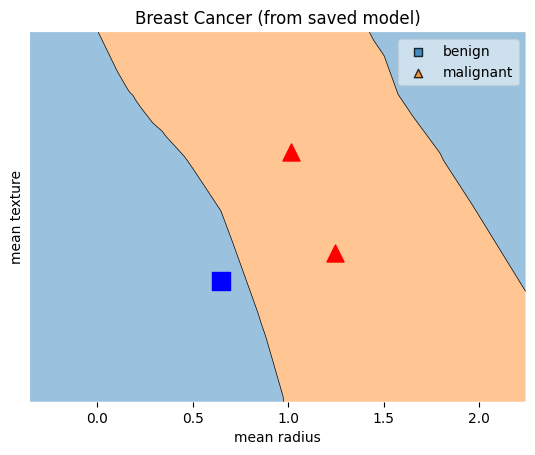

In [358]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

y = y_pred.reshape(1, -1)[0]

ax = plot_decision_regions(X_new_sc, y, clf=my_model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer (from saved model)') 
# plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.scatter(X_new_sc[:,0][y==0], X_new_sc[:,1][y==0], marker='s', s=150, c='b')
plt.scatter(X_new_sc[:,0][y==1], X_new_sc[:,1][y==1], marker='^', s=150, c='r')
plt.show()